# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Semestre 2022-2**<br>
**Profesora:** Paula Aguirre <br>

## Electoral Crypto World fluctuation. (Bitcoin)

---

In [86]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

1) ¿Existe alguna relación entre la fluctuación del Bitcoin con respecto a las otras divisas?
2) Si es que existe tal relación,¿El Bitcoin siempre ha tenido la misma influencia?.Y si es
que no existe tal relación, ¿Por qué el Bitcoin no afecta a las divisas?
3) ¿Se puede anticipar en corto y largo plazo el valor del Bitcoin a partir de los datos de las
divisas internacionales?
4) ¿Qué tan efectivo es este anticipo a corto plazo y largo plazo?
5) ¿Qué diferencias hay entre los diferentes algoritmos para predecir a corto plazo?

Data-frames

In [87]:
btc = pd.read_csv("divisas\BTC_USD Bitfinex Historical Data.csv")
cny = pd.read_csv("divisas\CNY_USD Historical Data.csv")
eur = pd.read_csv("divisas\EUR_USD Historical Data.csv")
gbp = pd.read_csv("divisas\GBP_USD Historical Data.csv")
jpy = pd.read_csv("divisas\JPY_USD Historical Data.csv")

Cambiamos a tipos de datos utiles para manipulación

In [88]:
div = [btc, cny, eur, gbp, jpy]
for d in div:
    d.drop(columns=["Vol.", "Change %"], inplace=True) #datos innecesarios

colums = btc.columns.drop(["Date"])
for c in colums:
    btc[c] = btc[c].str.replace(",", "")

for d in div:
    d["Date"] = pd.to_datetime(d["Date"])
    for c in colums:
        d[c] = d[c].astype("float")
colums

Index(['Price', 'Open', 'High', 'Low'], dtype='object')

In [89]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3940 non-null   datetime64[ns]
 1   Price   3940 non-null   float64       
 2   Open    3940 non-null   float64       
 3   High    3940 non-null   float64       
 4   Low     3940 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 154.0 KB


In [90]:
col =["Price", "Open", "High", "Low"]
for i in col:
    btc = btc.rename({i: f"BTC{i}"}, axis=1)
    cny = cny.rename({i: f"CNY{i}"}, axis=1)
    eur = eur.rename({i: f"EUR{i}"}, axis=1)
    gbp = gbp.rename({i: f"GBP{i}"}, axis=1)
    jpy = jpy.rename({i: f"JPY{i}"}, axis=1)
    
btc

,Date,BTCPrice,BTCOpen,BTCHigh,BTCLow
0,2022-11-19,16739.0,16645.0,16811.0,16600.0
1,2022-11-18,16634.0,16827.0,16837.0,16550.0
2,2022-11-17,16705.0,16676.0,16735.0,16413.0
3,2022-11-16,16531.0,16886.0,17002.0,16384.0
4,2022-11-15,16886.0,16627.0,17124.0,16554.0
...,...,...,...,...,...
3935,2012-02-06,5.4,5.4,5.4,5.4
3936,2012-02-05,5.7,5.7,5.7,5.7
3937,2012-02-04,5.9,5.9,5.9,5.9
3938,2012-02-03,6.0,6.0,6.0,6.0


**BTC VS CNY**

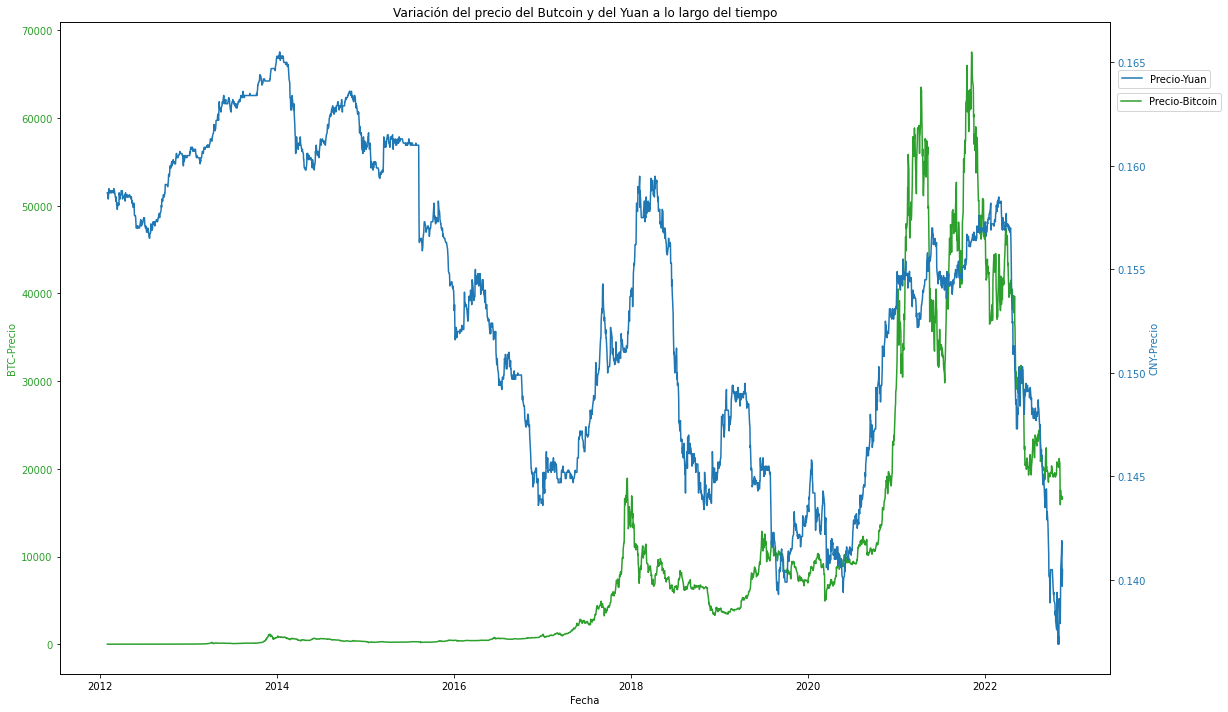

In [91]:
btc_cny = btc.merge(cny, on="Date", how="inner")

fig, ax1 = plt.subplots(figsize=(17, 10))
color = 'tab:green'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('BTC-Precio', color=color)
ax1.plot(btc_cny["Date"], btc_cny["BTCPrice"], color=color, label="Precio-Bitcoin")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax1.legend(bbox_to_anchor=(1.11, 0.9))


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('CNY-Precio', color=color)
ax2.plot(btc_cny["Date"], btc_cny["CNYPrice"], color=color, label="Precio-Yuan")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
ax2.legend(bbox_to_anchor=(1.1, 0.935), loc=0)
ax1.set_title("Variación del precio del Butcoin y del Yuan a lo largo del tiempo")
fig.tight_layout()
plt.show()

**BTC VS EUR**

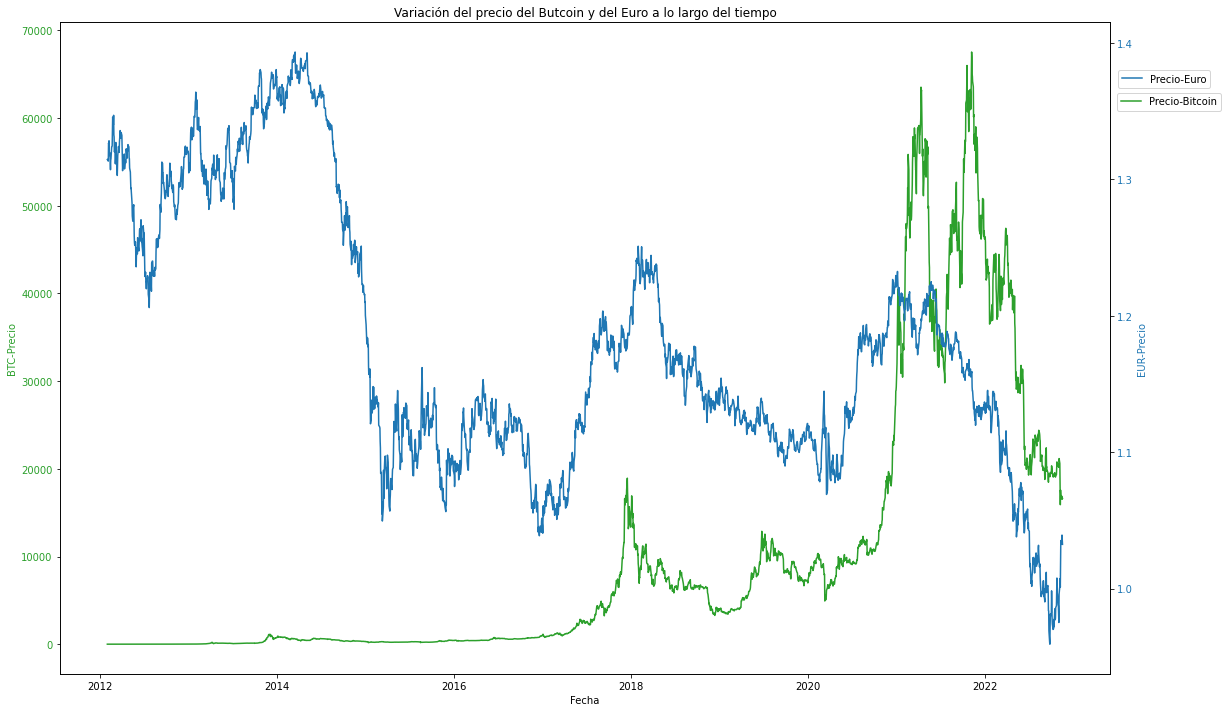

In [92]:
btc_eur = btc.merge(eur, on="Date", how="inner")

fig, ax1 = plt.subplots(figsize=(17, 10))
color = 'tab:green'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('BTC-Precio', color=color)
ax1.plot(btc_eur["Date"], btc_eur["BTCPrice"], color=color, label="Precio-Bitcoin")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax1.legend(bbox_to_anchor=(1.11, 0.9))


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('EUR-Precio', color=color)
ax2.plot(btc_eur["Date"], btc_eur["EURPrice"], color=color, label="Precio-Euro")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
ax2.legend(bbox_to_anchor=(1.1, 0.935), loc=0)
ax1.set_title("Variación del precio del Butcoin y del Euro a lo largo del tiempo")
fig.tight_layout()
plt.show()

**BTC VS GBP**

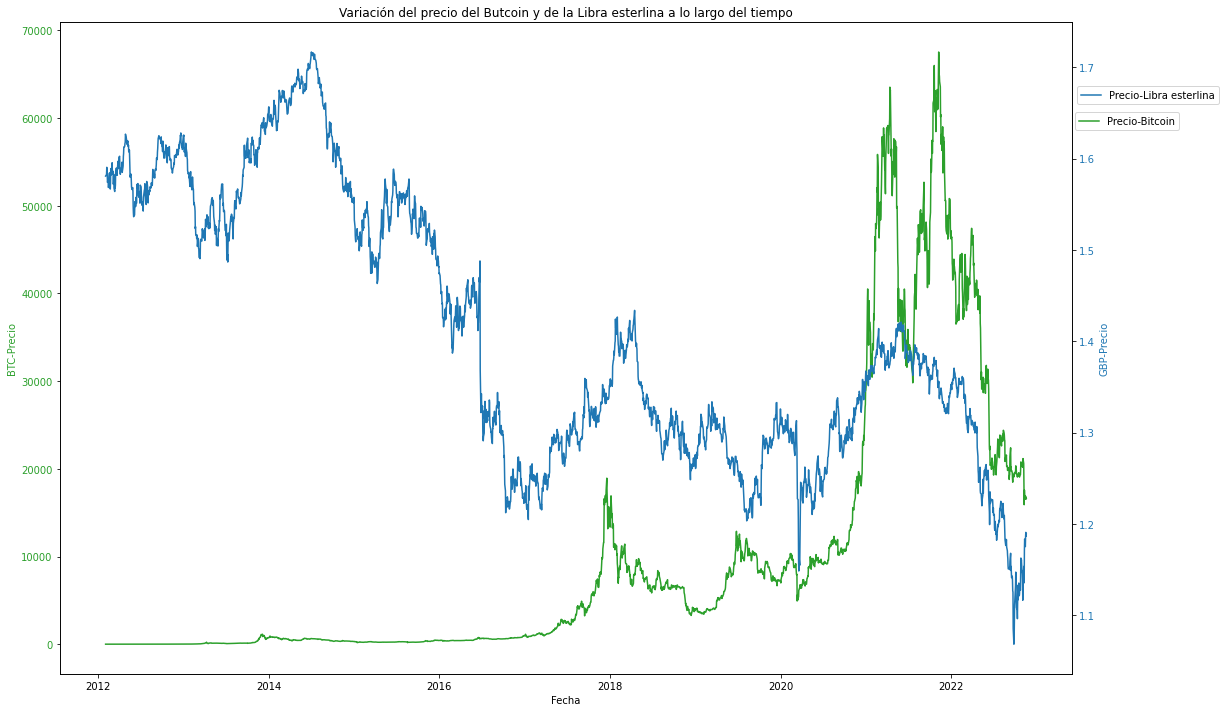

In [93]:
btc_gbp = btc.merge(gbp, on="Date", how="inner")

fig, ax1 = plt.subplots(figsize=(17, 10))
color = 'tab:green'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('BTC-Precio', color=color)
ax1.plot(btc_gbp["Date"], btc_gbp["BTCPrice"], color=color, label="Precio-Bitcoin")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax1.legend(bbox_to_anchor=(1.11, 0.87))


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('GBP-Precio', color=color)
ax2.plot(btc_gbp["Date"], btc_gbp["GBPPrice"], color=color, label="Precio-Libra esterlina")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
ax2.legend(bbox_to_anchor=(1.15, 0.91), loc=0)
ax1.set_title("Variación del precio del Butcoin y de la Libra esterlina a lo largo del tiempo")
fig.tight_layout()
plt.show()

**BTC VS JPY**

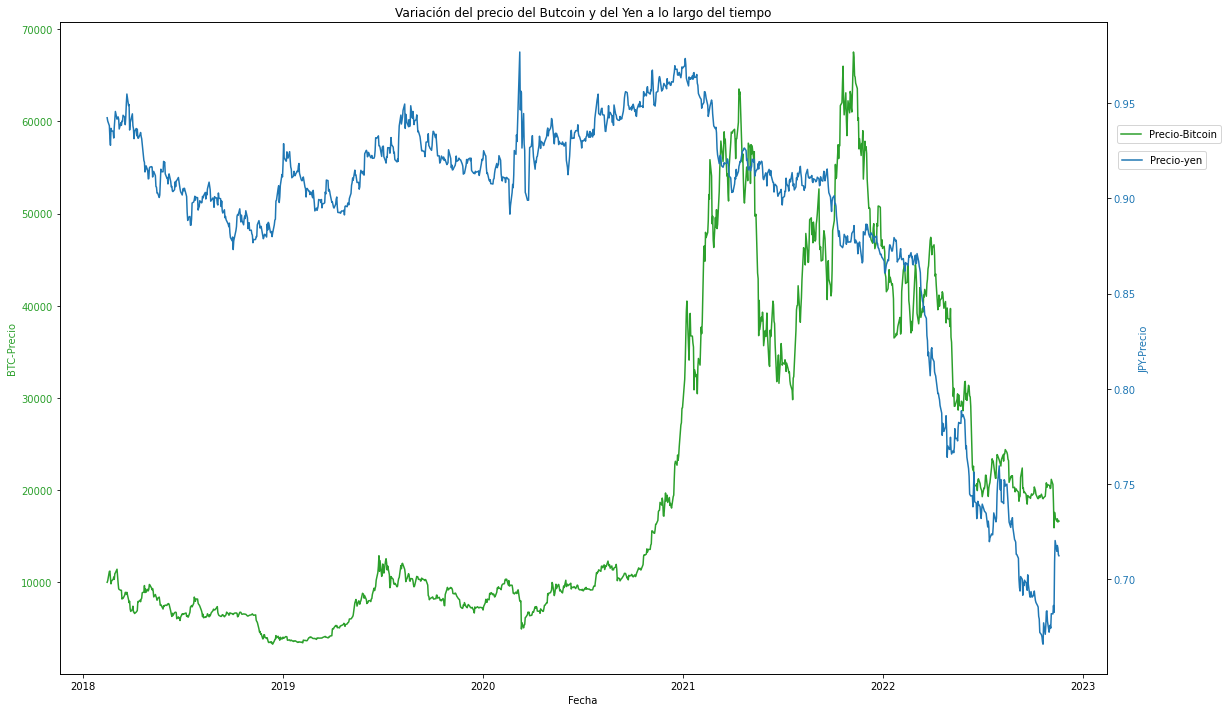

In [112]:
btc_jpy = btc.merge(jpy, on="Date", how="inner")

fig, ax1 = plt.subplots(figsize=(17, 10))
color = 'tab:green'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('BTC-Precio', color=color)
ax1.plot(btc_jpy["Date"], btc_jpy["BTCPrice"], color=color, label="Precio-Bitcoin")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
ax1.legend(bbox_to_anchor=(1.1139, 0.85))


ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('JPY-Precio', color=color)
ax2.plot(btc_jpy["Date"], btc_jpy["JPYPrice"], color=color, label="Precio-yen")
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend()
ax2.legend(bbox_to_anchor=(1.1, 0.81), loc=0)
ax1.set_title("Variación del precio del Butcoin y del Yen a lo largo del tiempo")
fig.tight_layout()
plt.show()

In [95]:
df_supremo = btc.merge(cny, on="Date", how="inner").merge(
    cny, on="Date", how="inner"
).merge(
    eur, on="Date", how="inner"
).merge(
    gbp,on="Date", how="inner"
).merge(
    jpy, on="Date", how="inner"
)
df_supremo

,Date,BTCPrice,BTCOpen,BTCHigh,BTCLow,CNYPrice_x,CNYOpen_x,CNYHigh_x,CNYLow_x,CNYPrice_y,...,EURHigh,EURLow,GBPPrice,GBPOpen,GBPHigh,GBPLow,JPYPrice,JPYOpen,JPYHigh,JPYLow
0,2022-11-18,16634.0,16827.0,16837.0,16550.0,0.1405,0.1397,0.1406,0.1397,0.1405,...,1.0396,1.0313,1.1889,1.1902,1.1951,1.1874,0.71240,0.71490,0.71615,0.71210
1,2022-11-17,16705.0,16676.0,16735.0,16413.0,0.1397,0.1411,0.1411,0.1396,0.1397,...,1.0407,1.0305,1.1865,1.1910,1.1958,1.1764,0.71290,0.71705,0.72000,0.71050
2,2022-11-16,16531.0,16886.0,17002.0,16384.0,0.1410,0.1419,0.1419,0.1410,0.1410,...,1.0439,1.0330,1.1908,1.1866,1.1944,1.1831,0.71650,0.71800,0.72085,0.71275
3,2022-11-15,16886.0,16627.0,17124.0,16554.0,0.1419,0.1419,0.1424,0.1416,0.1419,...,1.0481,1.0280,1.1858,1.1751,1.2027,1.1739,0.71780,0.71475,0.72635,0.71105
4,2022-11-14,16627.0,16345.0,17188.0,15829.0,0.1413,0.1412,0.1423,0.1412,0.1413,...,1.0368,1.0271,1.1752,1.1805,1.1830,1.1709,0.71480,0.72180,0.72215,0.71020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,2018-02-21,10455.0,11216.0,11239.0,10200.0,0.1575,0.1575,0.1575,0.1575,0.1575,...,1.2361,1.2281,1.3918,1.3996,1.4009,1.3905,0.92785,0.93175,0.93225,0.92665
1237,2018-02-20,11218.0,11172.0,11776.0,11101.0,0.1575,0.1575,0.1575,0.1575,0.1575,...,1.2414,1.2320,1.3996,1.4005,1.4026,1.3931,0.93165,0.93810,0.93845,0.93130
1238,2018-02-19,11173.0,10398.0,11250.0,10308.0,0.1575,0.1575,0.1575,0.1575,0.1575,...,1.2435,1.2368,1.4005,1.4034,1.4051,1.3958,0.93810,0.94045,0.94260,0.93695
1239,2018-02-16,10162.0,9996.0,10270.0,9674.9,0.1575,0.1575,0.1575,0.1575,0.1575,...,1.2557,1.2394,1.4042,1.4100,1.4146,1.3998,0.94060,0.94220,0.94750,0.93985
